In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set(style='whitegrid')

## Crosstab

In [40]:
df = pd.read_csv('../data/smoking.csv', delimiter=';')
df.head(5)

,Возраст,Пол,Должность,Курение
0,55,М,Ст. Менеджер,Да
1,28,Ж,Мл. Менеджер,Нет
2,27,М,Мл. Рабочий,Да
3,36,М,Ст. Рабочий,Да
4,50,Ж,Мл. Менеджер,Да


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Возраст    31 non-null     int64 
 1   Пол        31 non-null     object
 2   Должность  31 non-null     object
 3   Курение    31 non-null     object
dtypes: int64(1), object(3)
memory usage: 1.1+ KB


#### Таблица сопряженности признаков "Пол" "Курение"

In [4]:
df_sex_smoke = pd.crosstab(df['Пол'], df['Курение'])
df_sex_smoke

Курение,Да,Нет
Пол,,
Ж,3,11
М,13,4


#### Таблица сопряженности признаков "Должность" "Курение"

In [5]:
df_position_smoke = pd.crosstab(df['Должность'], df['Курение'])
df_position_smoke

Курение,Да,Нет
Должность,,
Мл. Менеджер,4,3
Мл. Рабочий,3,4
Ст. Менеджер,4,1
Ст. Рабочий,5,7


#### Добавим более обобщенную колонку должностей

In [6]:
df['Должность_общая'] = df['Должность'].str.split(expand=True)[1]
df.head()

,Возраст,Пол,Должность,Курение,Должность_общая
0,55,М,Ст. Менеджер,Да,Менеджер
1,28,Ж,Мл. Менеджер,Нет,Менеджер
2,27,М,Мл. Рабочий,Да,Рабочий
3,36,М,Ст. Рабочий,Да,Рабочий
4,50,Ж,Мл. Менеджер,Да,Менеджер


#### Таблица сопряженности признаков "Должность_общая" "Курение"

In [7]:
df_smoke = pd.crosstab(df['Должность_общая'], df['Курение'])
df_smoke

Курение,Да,Нет
Должность_общая,,
Менеджер,8,4
Рабочий,8,11


#### Еще один вариант

In [8]:
df['Должность_стмл'] = df['Должность'].str.split(expand=True)[0]
df.head()

,Возраст,Пол,Должность,Курение,Должность_общая,Должность_стмл
0,55,М,Ст. Менеджер,Да,Менеджер,Ст.
1,28,Ж,Мл. Менеджер,Нет,Менеджер,Мл.
2,27,М,Мл. Рабочий,Да,Рабочий,Мл.
3,36,М,Ст. Рабочий,Да,Рабочий,Ст.
4,50,Ж,Мл. Менеджер,Да,Менеджер,Мл.


In [9]:
df_smoke = pd.crosstab(df['Должность_стмл'], df['Курение'])
df_smoke

Курение,Да,Нет
Должность_стмл,,
Мл.,7,7
Ст.,9,8


## Графики

<AxesSubplot:xlabel='Возраст', ylabel='Count'>

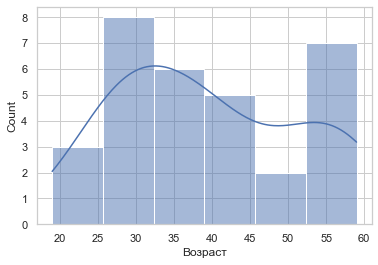

In [10]:
sns.histplot(x=df['Возраст'], kde=True)

<AxesSubplot:xlabel='Должность', ylabel='Count'>

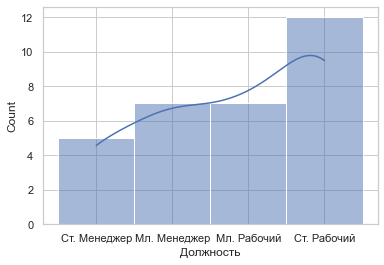

In [11]:
sns.histplot(x=df['Должность'], kde=True)

<AxesSubplot:>

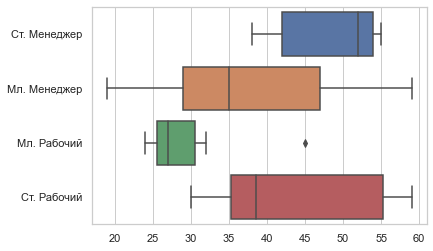

In [12]:
sns.boxplot(x=df['Возраст'].values, y=df['Должность'].values)

<AxesSubplot:ylabel='count'>

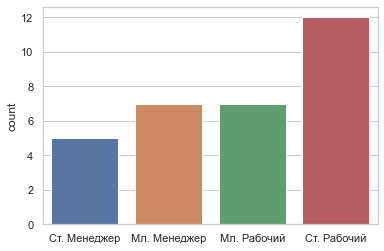

In [13]:
sns.countplot(x=df['Должность'].values)

<AxesSubplot:xlabel='Должность', ylabel='Курение'>

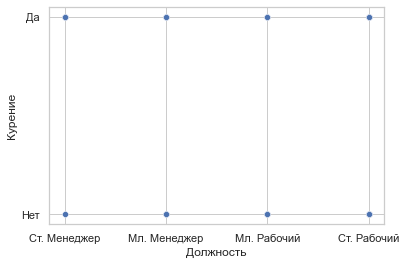

In [41]:
sns.scatterplot(x=df['Должность'], y=df['Курение'])

## Cut qcut 

<AxesSubplot:xlabel='Возраст_cat', ylabel='count'>

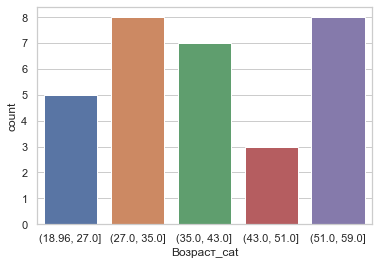

In [20]:
# Equal-width
df['Возраст_cat'] = pd.cut(df['Возраст'], bins=5)
sns.countplot(x=df['Возраст_cat'])

<AxesSubplot:xlabel='Возраст_qcat', ylabel='count'>

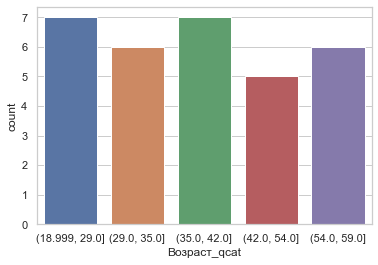

In [21]:
# Equal-height
df['Возраст_qcat'] = pd.qcut(df['Возраст'], 5)
sns.countplot(x=df['Возраст_qcat'])

## Критерий хи-квадрат 
Предназначен для проверки гипотезы H0: X и Y независимы против альтернатив H_а об их зависимости

In [111]:
a = np.array([
    [25, 5, 2],
    [30, 11, 5],
    [35, 12, 10]
])



n = a.sum()
m = len(a)
k = len(a[0])
a

array([[25,  5,  2],
       [30, 11,  5],
       [35, 12, 10]])

In [112]:
#хи-квадрат из scipy
s, p, d, mf = stats.chi2_contingency(a, correction=False)
print(s, "статистика хи-квадрат")
print(p, "p-значение")
print(d, "количество степеней свободы")
print(mf, "матрица ожидаемых частот")

3.7515811888256447 статистика хи-квадрат
0.4406682436539594 p-значение
4 количество степеней свободы
[[21.33333333  6.63703704  4.02962963]
 [30.66666667  9.54074074  5.79259259]
 [38.         11.82222222  7.17777778]] матрица ожидаемых частот


In [113]:
#Ручная реализация критерия хи-квадрат

t_sum = 0
m = len(a)
k = len(a[0])
for i in range(m):
    for j in range(k):
        nij = a[i][j]
        ni = a[i,:].sum()
        nj = a[:, j].sum()
        
        t_sum += (nij - ni*nj/n)**2/(ni*nj)


chi2 = n * t_sum
print(chi2, "хи-квадрат")

p_value = 1 - stats.chi2.cdf(chi2, df=(m-1)*(k-1))
print(p_value, "p-значение")

3.751581188825644 хи-квадрат
0.4406682436539596 p-значение


In [114]:
print(s,p)
print(chi2, p_value)

3.7515811888256447 0.4406682436539594
3.751581188825644 0.4406682436539596


## Мера связи Пирсона и Крамера

In [115]:
#Коэффициент взаимной сопряженности (коэффициент Пирсона)
P = np.sqrt(chi2/(chi2+n))

#Коэффициент Крамера
C = np.sqrt(chi2/(n*min(m-1,k-1)))
print(P,C)

0.16443270616691025 0.11787597356458475


## Пример (численные значения)

array([39, 50, 37, 22, 67, 67, 52, 64, 58, 31, 29, 37, 21, 29, 29, 52, 27,
       42, 68, 63, 48, 41, 64, 23, 29, 43, 60, 22, 62, 43, 57, 65, 43, 61,
       51, 68, 41, 55, 68, 64, 59, 59, 61, 21, 56, 54, 46, 45, 46, 34, 36,
       35, 43, 64, 63, 57, 55, 24, 48, 32, 26, 56, 31, 35, 47, 40, 48, 51,
       62, 48, 27, 66, 61, 39, 33, 59, 46, 25, 35, 47, 22, 65, 55, 55, 34,
       47, 42, 25, 36, 20, 34, 55, 64, 52, 61, 39, 66, 53, 44, 58])

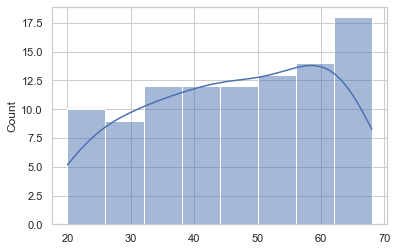

In [26]:
age = np.random.randint(20, 70, 100)
sns.histplot(age, kde=True)
age

<AxesSubplot:ylabel='Count'>

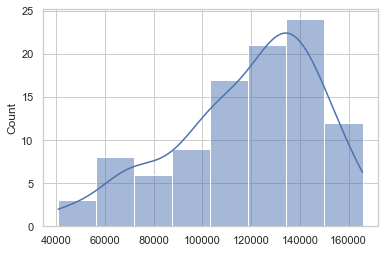

In [27]:
salary = 150_000 - 150*(age - 45)**2 + np.random.normal(0, 10000, size=age.size)
sns.histplot(salary, kde=True)

<AxesSubplot:>

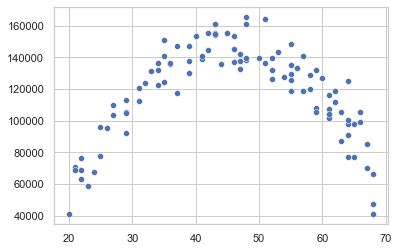

In [28]:
sns.scatterplot(x=age, y=salary)

In [29]:
stats.spearmanr(age, salary)

SpearmanrResult(correlation=-0.07449117702983336, pvalue=0.46138351786506837)

In [30]:
age_cat = pd.qcut(age, 5)
sal_cat = pd.qcut(salary, 5)

In [31]:
age_cat

[(32.8, 43.0], (43.0, 52.0], (32.8, 43.0], (19.999, 32.8], (61.0, 68.0], ..., (32.8, 43.0], (61.0, 68.0], (52.0, 61.0], (43.0, 52.0], (52.0, 61.0]]
Length: 100
Categories (5, interval[float64]): [(19.999, 32.8] < (32.8, 43.0] < (43.0, 52.0] < (52.0, 61.0] < (61.0, 68.0]]

In [32]:
sal_cat

[(116985.481, 132069.266], (132069.266, 141158.77], (141158.77, 165749.222], (40821.161, 96064.522], (40821.161, 96064.522], ..., (132069.266, 141158.77], (96064.522, 116985.481], (141158.77, 165749.222], (132069.266, 141158.77], (116985.481, 132069.266]]
Length: 100
Categories (5, interval[float64]): [(40821.161, 96064.522] < (96064.522, 116985.481] < (116985.481, 132069.266] < (132069.266, 141158.77] < (141158.77, 165749.222]]

<AxesSubplot:ylabel='count'>

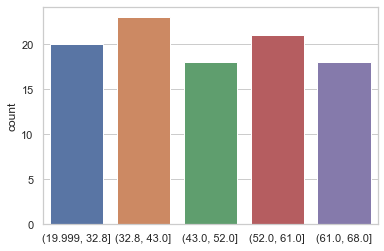

In [33]:
sns.countplot(x=age_cat)

<AxesSubplot:ylabel='count'>

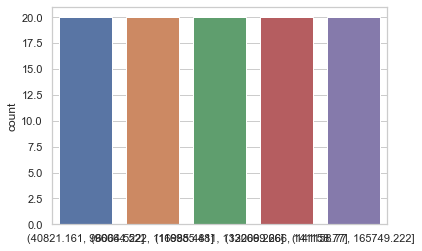

In [34]:
sns.countplot(x=sal_cat)

In [35]:
df =  pd.DataFrame(np.vstack([age_cat, sal_cat]).T, columns=['Age', 'Salary'])
df.head()

,Age,Salary
0,"(32.8, 43.0]","(116985.481, 132069.266]"
1,"(43.0, 52.0]","(132069.266, 141158.77]"
2,"(32.8, 43.0]","(141158.77, 165749.222]"
3,"(19.999, 32.8]","(40821.161, 96064.522]"
4,"(61.0, 68.0]","(40821.161, 96064.522]"


In [38]:
pd.crosstab(df['Age'], df['Salary'])

Salary,"(40821.161, 96064.522]","(96064.522, 116985.481]","(116985.481, 132069.266]","(132069.266, 141158.77]","(141158.77, 165749.222]"
Age,,,,,
"(19.999, 32.8]",11,7,2,0,0
"(32.8, 43.0]",0,0,6,6,11
"(43.0, 52.0]",0,0,2,9,7
"(52.0, 61.0]",0,6,8,5,2
"(61.0, 68.0]",9,7,2,0,0


In [39]:
stats.chi2_contingency(pd.crosstab(df['Age'], df['Salary']))

(90.61525189786059,
 1.92686788798715e-12,
 16,
 array([[4. , 4. , 4. , 4. , 4. ],
        [4.6, 4.6, 4.6, 4.6, 4.6],
        [3.6, 3.6, 3.6, 3.6, 3.6],
        [4.2, 4.2, 4.2, 4.2, 4.2],
        [3.6, 3.6, 3.6, 3.6, 3.6]]))

### Задача хи-1

In [43]:
matrix = [[165,185],
         [168, 92],
         [115, 105],
         [32, 38]
        ]

In [48]:
s, p, _, _ = stats.chi2_contingency(matrix, correction=False)
print(s,p)

20.417818788354502 0.00013904727089156523


In [47]:
if p>0.05:
    print('Принимаем H0, то есть признаки независимы')
else:
    print('Отвергаем H0 в пользу альтернативы, то есть имеется зависимость между признаками')

Отвергаем H0 в пользу альтернативы, то есть имеется зависимость между признаками


### Задача хи-2 

In [49]:
matrix2 = [[1768, 806, 236],
           [946, 1387, 800],
           [115, 438, 304]
          ]

In [51]:
s, p, _, _ = stats.chi2_contingency(matrix2, correction=False)
print(s,p)

1045.0606153542653 6.122271387910211e-225


In [52]:
if p>0.05:
    print('Принимаем H0, то есть признаки независимы')
else:
    print('Отвергаем H0 в пользу альтернативы, то есть имеется зависимость между признаками')

Отвергаем H0 в пользу альтернативы, то есть имеется зависимость между признаками


### Задача хи-4 

In [54]:
matrix3 = [[83, 154],
           [278, 354],
           [470, 299],
           [204, 76],
           [46, 20],
           [13, 3]
          ]

In [55]:
s, p, _, _ = stats.chi2_contingency(matrix3, correction=False)
print(s,p)

126.88989921885339 1.0874132666163569e-25


In [56]:
if p>0.05:
    print('Принимаем H0, то есть признаки независимы')
else:
    print('Отвергаем H0 в пользу альтернативы, то есть имеется зависимость между признаками')

Отвергаем H0 в пользу альтернативы, то есть имеется зависимость между признаками


###  Задача хи-5

In [58]:
df1 = pd.DataFrame(data={'Возраст':[20, 22, 25, 26, 29, 31, 33, 36, 39, 40, 41, 42, 45, 47, 51, 53, 55, 58, 59, 60, 61, 63, 66, 68, 69, 70],
                         'Вес': [74.1, 79.2, 77.5, 75.6, 81.1, 78.2, 82.4, 84.2, 79.1, 83.1, 85.3, 88.9, 87.4, 81.9, 80, 85, 83.6, 81.4, 80.5, 80, 78.6, 77.1, 80.3, 79, 79.6, 78.2]
                        })
df1.head(5)

,Возраст,Вес
0,20,74.1
1,22,79.2
2,25,77.5
3,26,75.6
4,29,81.1


<AxesSubplot:xlabel='Возраст_cat', ylabel='count'>

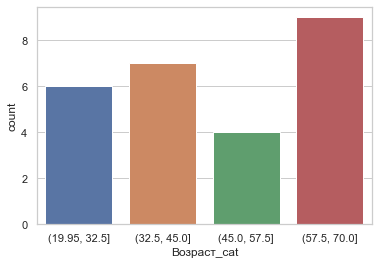

In [121]:
df1['Возраст_cat'] = pd.cut(df1['Возраст'], 4)
df1.head(5)
sns.countplot(x = df1['Возраст_cat'])

<AxesSubplot:xlabel='Вес_cat', ylabel='count'>

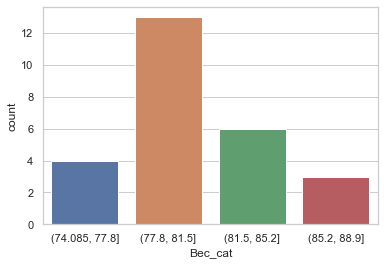

In [126]:
df1['Вес_cat'] = pd.cut(df1['Вес'], 4)
sns.countplot(x = df1['Вес_cat'])

In [127]:
cross = pd.crosstab(df1['Вес_cat'], df1['Возраст_cat'])
cross

Возраст_cat,"(19.95, 32.5]","(32.5, 45.0]","(45.0, 57.5]","(57.5, 70.0]"
Вес_cat,,,,
"(74.085, 77.8]",3,0,0,1
"(77.8, 81.5]",3,1,1,8
"(81.5, 85.2]",0,3,3,0
"(85.2, 88.9]",0,3,0,0


In [128]:
cross.values

array([[3, 0, 0, 1],
       [3, 1, 1, 8],
       [0, 3, 3, 0],
       [0, 3, 0, 0]])

In [129]:
s, p, _, _ = stats.chi2_contingency(cross.values, correction=False)
print(s,p)

28.944444444444443 0.0006621715710685211
